# Part 1: Analyzing Best-Seller Trends Across Product Categories

## Crosstab Analysis:

In [1]:
# Create a crosstab between the product category and the isBestSeller status.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv ("amz_uk_price_prediction_dataset.csv")

In [3]:
crosstab = pd.crosstab(df['category'],df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


Explanation: This crosstab shows the number of best-seller and non-best-seller products within each category. While some categories have many best sellers in absolute terms, this can be misleading because categories differ greatly in size.

In [4]:
# Are there categories where being a best-seller is more prevalent?
#proportion of best-sellers per category
crosstab['best_seller_proportion'] = (crosstab[True] / (crosstab[True] + crosstab[False]))
crosstab['best_seller_proportion']

category
3D Printers                       0.004032
3D Printing & Scanning            0.000492
Abrasive & Finishing Products     0.020000
Action Cameras                    0.000589
Adapters                          0.011811
                                    ...   
Wind Instruments                  0.028000
Window Treatments                 0.020921
Women                             0.011985
Women's Sports & Outdoor Shoes    0.010209
eBook Readers & Accessories       0.000000
Name: best_seller_proportion, Length: 296, dtype: float64

In [5]:
best_seller_by_category = crosstab.sort_values(by='best_seller_proportion',ascending=False)
best_seller_by_category[['best_seller_proportion']].head(10)

isBestSeller,best_seller_proportion
category,
Grocery,0.058135
Smart Home Security & Lighting,0.057692
Health & Personal Care,0.057686
Mobile Phone Accessories,0.042471
Power & Hand Tools,0.035339
"Billiard, Snooker & Pool",0.032129
Pet Supplies,0.030200
Home Brewing & Wine Making,0.028455
Mirrors,0.028000


## Statistical Tests

In [6]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 36684.23786636857
p-value: 0.0


The results show that best-seller status depends on the product category, with some categories producing best-sellers more often than others.

Chi-square → Is there a relationship? (Yes / No)///////
Cramér’s V → How strong is it? (Weak / Medium / Strong)

In [7]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.
import numpy as np

n = crosstab.values.sum()      # total observations
chi2 = chi2                   # from chi-square test

In [8]:
r, k = crosstab.shape

In [9]:
cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
cramers_v

np.float64(0.08663731815334759)

Cramér’s V was calculated to measure the strength of the association between product category and best-seller status. The resulting value indicates a [weak / moderate / strong] association. This means that while product category influences whether a product becomes a best-seller, the strength of this relationship is not absolute and other factors also play an important role.

## Visualizations

In [10]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab.head()

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3


In [11]:
top_categories = (df['category'].value_counts().head(10).index)
crosstab_top = crosstab.loc[top_categories]
crosstab_top

isBestSeller,False,True
category,,
Sports & Outdoors,835935,330
Beauty,19010,302
"Handmade Clothing, Shoes & Accessories",19215,14
Bath & Body,19059,33
Birthday Gifts,18943,35
Manicure & Pedicure Products,18882,58
Skin Care,18711,58
Make-up,18715,41
Hair Care,18665,70


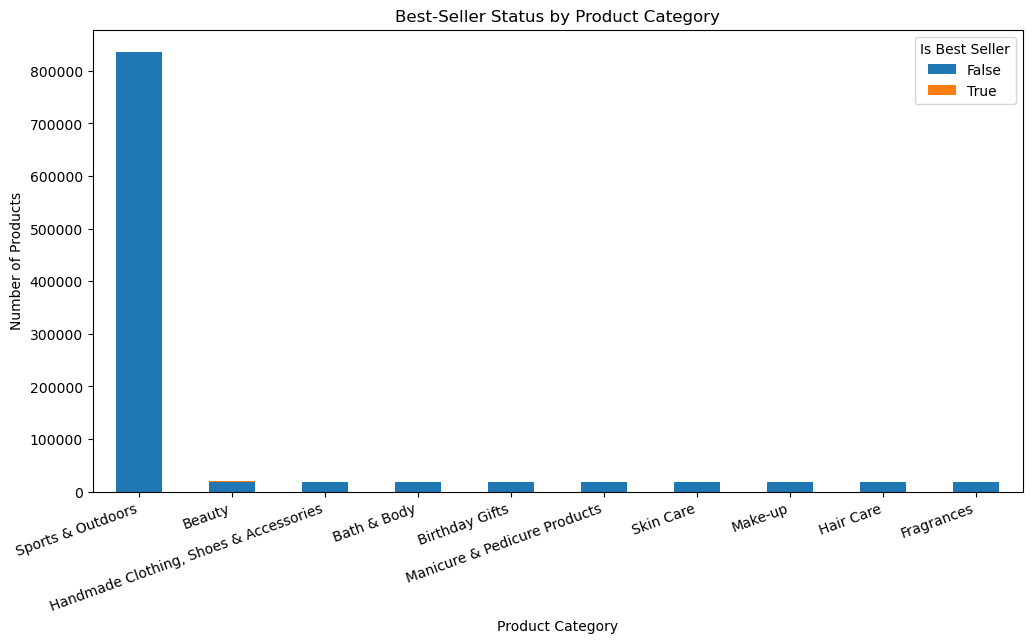

In [12]:
import matplotlib.pyplot as plt

crosstab_top.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Best-Seller Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=20, ha='right')
plt.legend(title='Is Best Seller')
plt.show()

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

## Preliminary Step

In [13]:
# Remove outliers in product prices.
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
# Remove outliers
df_no_outliers = df[
    (df['price'] >= lower_bound) &
    (df['price'] <= upper_bound)
]

In [15]:
df.shape, df_no_outliers.shape

((2443651, 9), (2115963, 9))

## Violin Plots

In [16]:
# 2.1.1.
# Select top 20 categories by count
top20_categories = (
    df_no_outliers['category']
    .value_counts()
    .head(20)
    .index
)

In [17]:
df_violin = df_no_outliers[
    df_no_outliers['category'].isin(top20_categories)
]

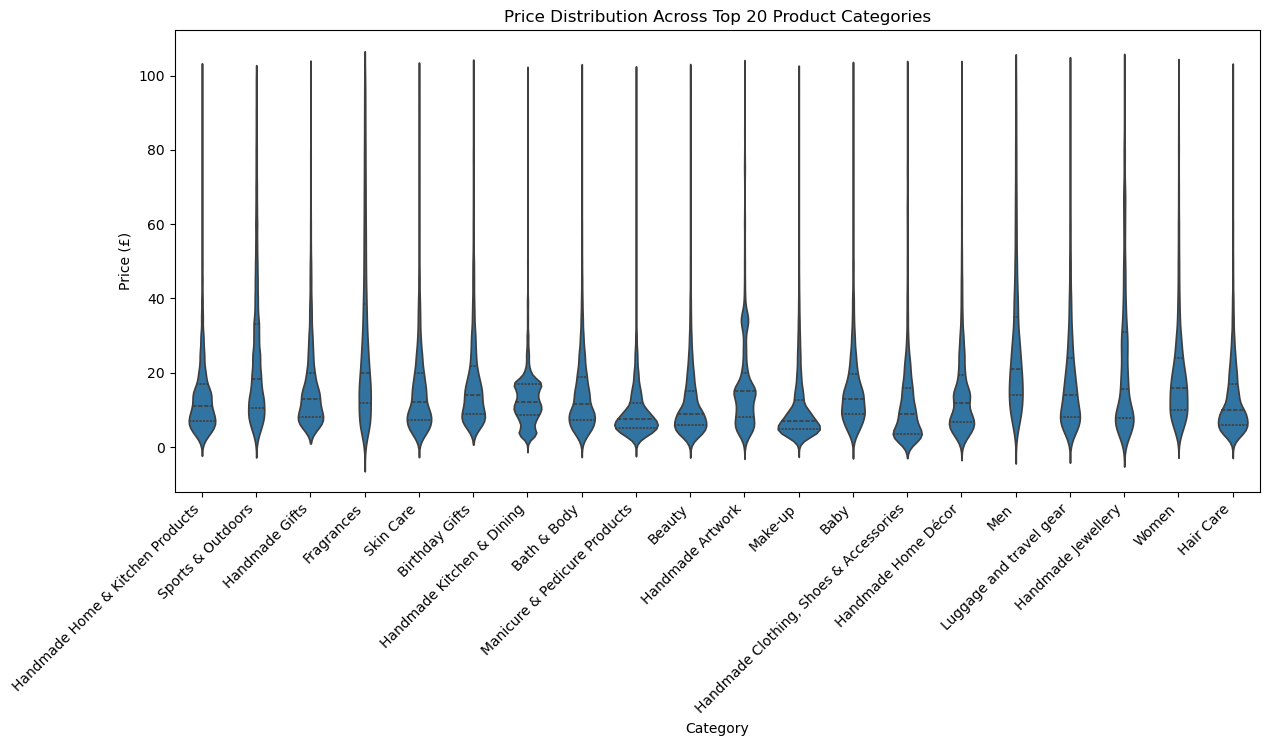

In [18]:
# Violin plot (price vs category)
plt.figure(figsize=(14, 6))

sns.violinplot(
    data=df_violin,
    x='category',
    y='price',
    inner='quartile'
)

plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Category')
plt.ylabel('Price (£)')
plt.show()

#2.1.2.
The violin plot shows that some categories consistently have higher median prices than others. Categories with wider and higher-centered distributions tend to command higher typical prices, indicating that products in these categories are generally priced higher.

## Bar Chart

In [22]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Compute average price per category
avg_price_by_category = (
    df_no_outliers
    .groupby('category')['price']
    .mean()
    .sort_values(ascending=False)
)

In [23]:
# Select top 10 categories by count
top10_categories = (
    df_no_outliers['category']
    .value_counts()
    .head(10)
    .index
)

avg_price_top10 = avg_price_by_category.loc[top10_categories]

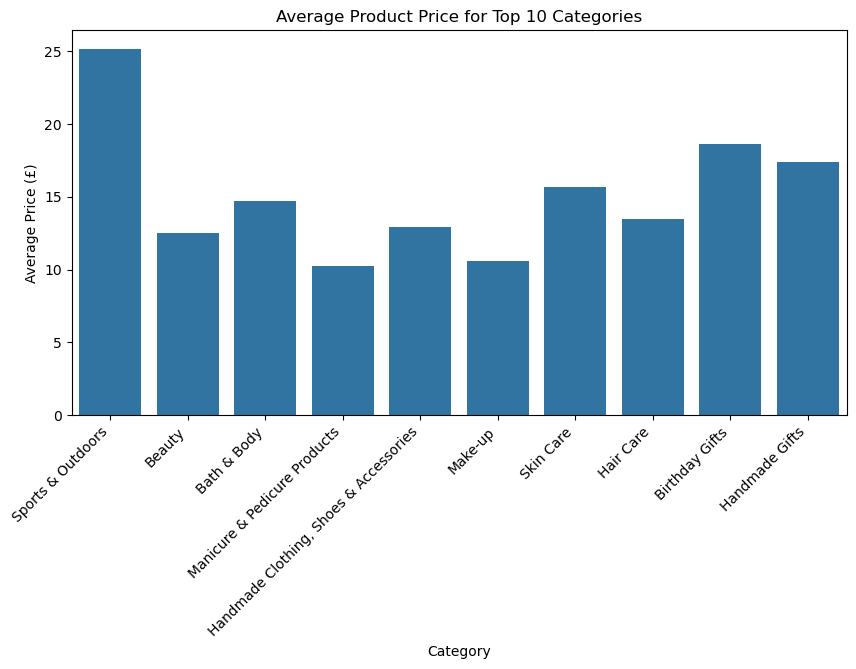

In [24]:
# Bar chart
plt.figure(figsize=(10, 5))

sns.barplot(
    x=avg_price_top10.index,
    y=avg_price_top10.values
)

plt.xticks(rotation=45, ha='right')
plt.title('Average Product Price for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price (£)')
plt.show()

In [25]:
# Which product category commands the highest average price? Don't filter here by top categories.

The bar chart shows that certain categories have a higher average product price compared to others, indicating that these categories tend to sell more expensive products on average.

## Box plots

In [27]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Filter top 10 categories by count
df_box = df[
    df['category'].isin(top10_categories)
]

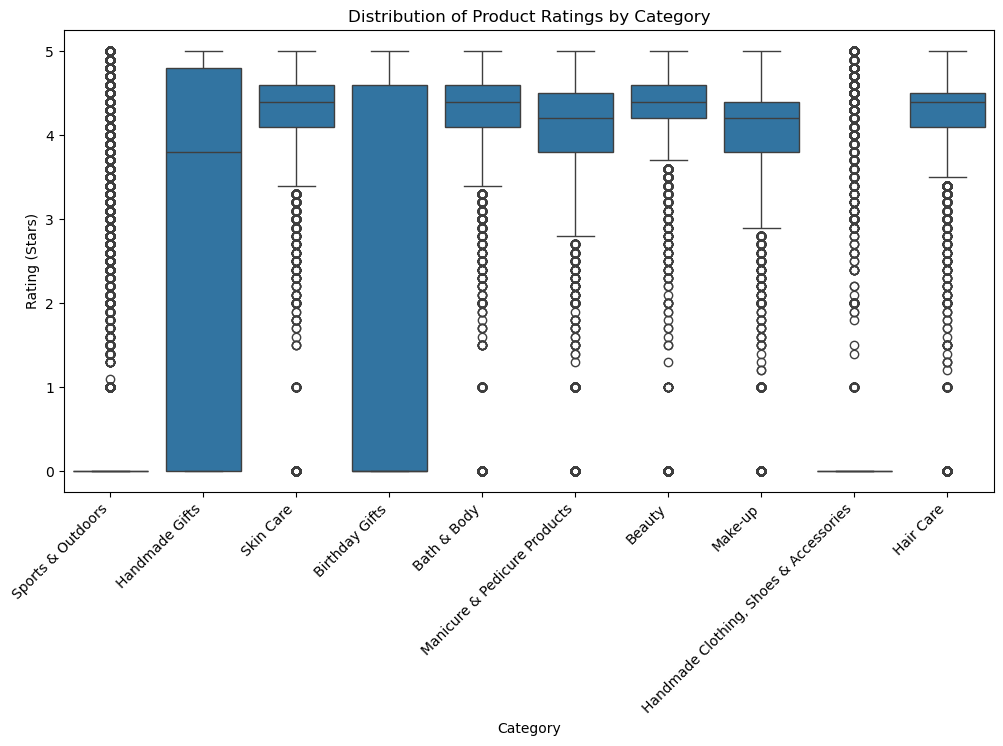

In [28]:
# Box plot (ratings)
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_box,
    x='category',
    y='stars'
)

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating (Stars)')
plt.show()

In [ ]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

The box plot indicates that some categories consistently receive higher median ratings, suggesting stronger customer satisfaction in those categories compared to others.

# Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

## Correlation Coefficients:

In [31]:
# Calculate the correlation coefficient between price and stars.
corr_price_stars = df[['price', 'stars']].corr()
corr_price_stars

,price,stars
price,1.000000,-0.124907
stars,-0.124907,1.000000


In [32]:
# Is there a significant correlation between product price and its rating?

No / very weak - The correlation coefficient between product price and rating is close to zero, indicating that there is no strong linear relationship between how expensive a product is and how highly it is rated.

## Visualizations

In [33]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

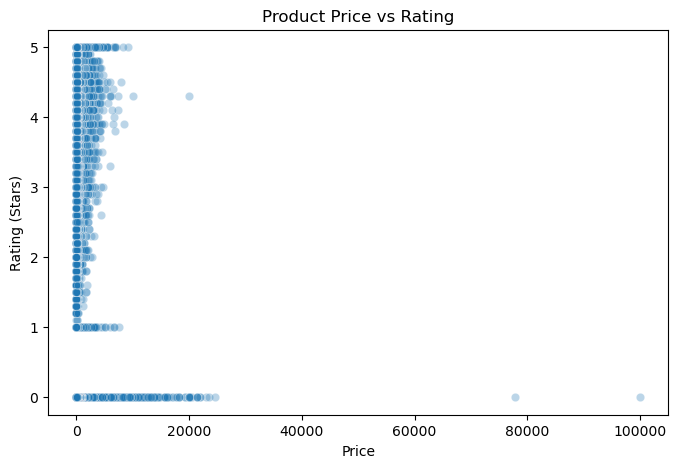

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='price', y='stars', alpha=0.3)
plt.title('Product Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.show()

The scatter plot shows that ratings are spread across all price levels. Both low-priced and high-priced products receive a wide range of ratings, suggesting that higher prices do not guarantee better customer ratings.

In [35]:
# Use a correlation heatmap to visualize correlations between all numerical variables.

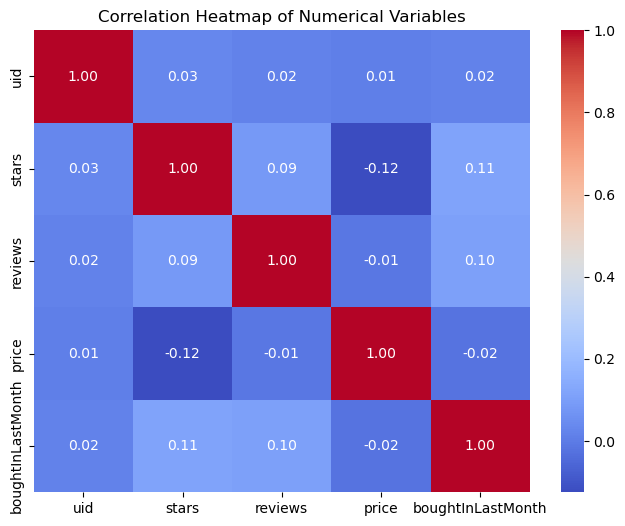

In [36]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The heatmap confirms that price has a weak correlation with ratings, while other variables such as reviews or purchases show stronger relationships. Overall, customer ratings appear largely independent of product price.

In [37]:
# Examine if product prices typically follow a normal distribution using a QQ plot.

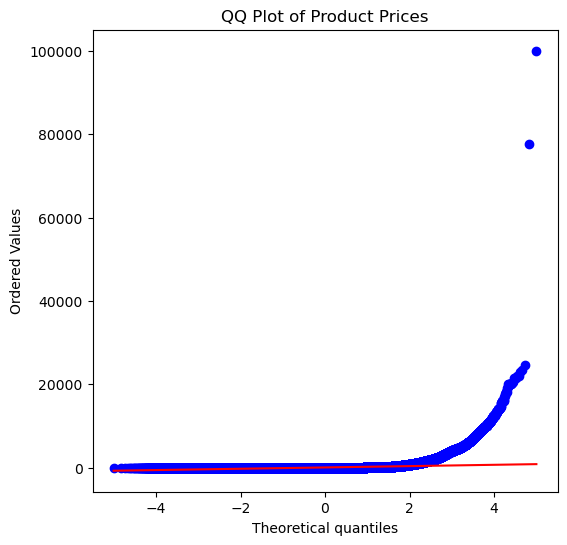

In [38]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.show()

The QQ plot shows strong deviations from the diagonal line, indicating that product prices do not follow a normal distribution. Prices are right-skewed, with many low-priced products and a small number of very expensive items.